In [274]:
import numpy as np
import matplotlib.pyplot as plt

In [275]:
# activation function
def softplus(x):
    return np.log(1 + np.exp(x))

def d_softplus(x):
    return np.exp / (1 + np.exp(-x))

## Data Generation

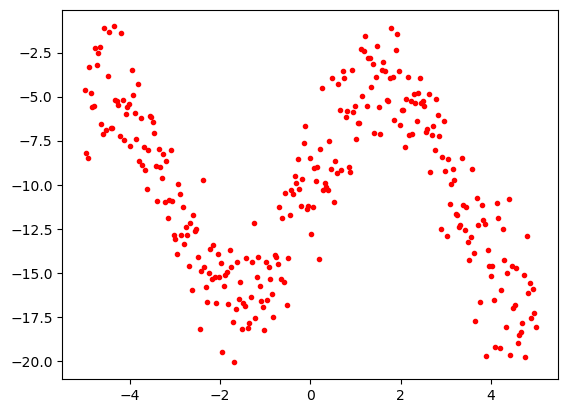

In [317]:
x_data = np.linspace(-5, 5, 300)
y_data = np.random.normal(-10, 2, x_data.shape) + np.sin(x_data) * 6

plt.plot(x_data, y_data, 'r.', label='y_data')

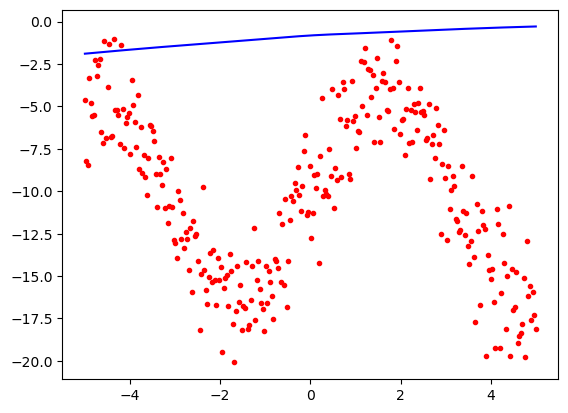

In [341]:


# Parameter initialization
w1, w2, w3, w4, w5, w6 = np.random.normal(size=6)

b1, b2, b3, b4 = 0, 0, 0, 0

def forward(x):
    y_pred = w4*softplus(w1 * x + b1) + w5*softplus(w2 * x + b2) + w6*softplus(w3 * x + b3) + b4
    return y_pred

def plot_line():
    plt.plot(x_data, y_data, 'r.', label='y_data')
    plt.plot(x_data, forward(x_data), 'b-', label='y_pred')

plot_line()

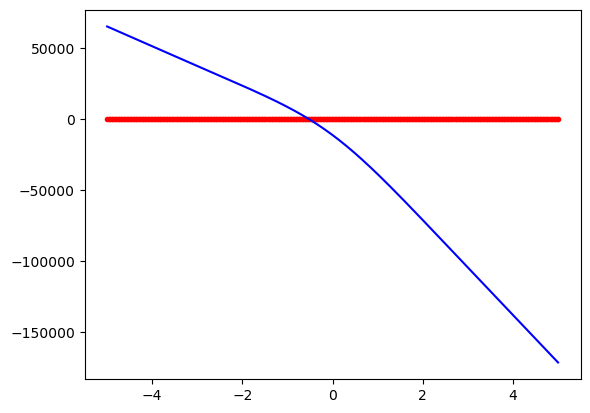

In [339]:
learning_rate = 0.001

def SSR(y_pred, y_data):
    return np.sum(np.power(y_pred - y_data, 2))

grad_b4 = lambda x: -2 * sum(y_data - forward(x))
grad_w4 = lambda x: -2 * sum((y_data - forward(x)) * softplus(w1 * x + b1))
grad_w5 = lambda x: -2 * sum((y_data - forward(x)) * softplus(w2 * x + b2))
grad_w6 = lambda x: -2 * sum((y_data - forward(x)) * softplus(w3 * x + b3))


grad_b1 = lambda x: -2 * sum((y_data - forward(x)) * w3 * softplus(w1 * x + b1) * (1 - softplus(w1 * x + b1)))
grad_b2 = lambda x: -2 * sum((y_data - forward(x)) * w4 * softplus(w2 * x + b2) * (1 - softplus(w2 * x + b2)))
grad_w1 = lambda x: -2 * sum((y_data - forward(x)) * w3 * d_softplus(w1 * x + b1) * x)
grad_w2 = lambda x: -2 * sum((y_data - forward(x)) * w4 * d_softplus(w1 * x + b1) * x)

for i in range(10):
    b4 = b4 - learning_rate * grad_b4(x_data)
    w4 = w4 - learning_rate * grad_w4(x_data)
    w5 = w5 - learning_rate * grad_w5(x_data)
    w6 = w6 - learning_rate * grad_w6(x_data)


plot_line()
